In [1]:
import pandas as pd
import numpy as np
import sklearn as sk 
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def read_file(filename):
    emails = list()
    label = list()
    with open(filename, 'r') as f:
        for line in f:
            row = line.strip().split()
            label.append(int(row[0]))
            emails.append(row[1:])
    return emails, label

In [2]:
emails, label = read_file(r'C:\Users\Varshith\Desktop\homeworks\Emory_HW\ML\hw3\spamAssassin.data')

In [3]:
split_id = int(len(emails) * 0.8)

train_emails, train_label = emails[:split_id],label[:split_id]
test_emails, test_label = emails[split_id:], label[split_id:]

In [4]:
import numpy as np
from collections import Counter

def build_vocab(train, test, minn):

    vocabulary = Counter()
    for email in train:
        vocabulary.update(email)  
    for email in test:
        vocabulary.update(email)
        
    vocab = [w for w in vocabulary if vocabulary[w] >= minn]
  
    vocab_map = {w:i for i,w in enumerate(vocab)}

    train_vecs = []
    for email in train:
        vec = [0] * len(vocab)
        for word in email:
            if word in vocab_map:
                vec[vocab_map[word]] = 1
        train_vecs.append(vec)
    test_vecs = []
    for email in test:
        vec = [0] * len(vocab)
        for word in email:
            if word in vocab_map:
                vec[vocab_map[word]] = 1
        test_vecs.append(vec)
  
    return np.array(train_vecs), np.array(test_vecs), vocab_map

In [5]:
train, test, map1 = build_vocab(train_emails, test_emails, 20)
train_label = np.array(train_label)
train_label[train_label==0] = -1
test_label = np.array(test_label)
test_label[test_label==0] = -1

In [6]:
class Perceptron():

    def __init__(self, epoch):
        self.epoch = epoch
        self.w = None
        return

    def get_weight(self):
        return self.w

    def sample_update(self, x, y):
        prediction = np.dot(x, self.w)
        mistake = 0
        if y * prediction <= 0:
            mistake = 1
            self.w += y * x
        if prediction == 0:
            mistake = 1
            self.w += x	
        return self.w, mistake
    

    def train(self, trainx, trainy):
        bias = np.ones((trainx.shape[0], 1))
        trainx = np.hstack((bias, trainx))
        self.w = np.zeros(trainx.shape[1])
        mistakes = {}
        epoch = 0
        while True:
            epoch += 1
            mistakes[epoch] = 0
            for x, y in zip(trainx, trainy):
                self.w, mis = self.sample_update(x,y)
                mistakes[epoch]+= mis
            if mistakes[epoch] == 0 or epoch == self.epoch:
                break
        return  mistakes

    def predict(self, newx):
        bias = np.ones((newx.shape[0], 1))
        newx = np.hstack((bias, newx)) 
        preds = np.dot(newx, self.w)
        preds = np.sign(preds)
        preds[preds == 0] = 1
        return preds

In [7]:
train, test, map1 = build_vocab(train_emails, test_emails, 20)
X_train, X_test, y_train, y_test = train, test, train_label, test_label
# y_test = np.array(y_test)
# y_test[y_test == 0] = -1  
# y_train = np.array(y_train)
# y_train[y_train == 0] = -1 
p = Perceptron(5)
p.train(X_train, y_train)
weights = p.get_weight()
pred = p.predict(X_test)
pred

array([ 1., -1.,  1., ..., -1.,  1., -1.])

AUC_train:  0.9695359946953599 Accuracy_train:  0.9802083333333333 F1:  0.967741935483871 F2:  0.951268357810414
AUC_test:  0.9530057094634685 Accuracy_test:  0.9683333333333334 F1:  0.9457142857142858 F2:  0.9266517357222845
AUC_train:  0.9946456289464564 Accuracy_train:  0.994375 F1:  0.9911271771278344 F2:  0.9936742224565103
AUC_test:  0.9758237845963159 Accuracy_test:  0.975 F1:  0.959349593495935 F2:  0.9703947368421052
AUC_train:  0.9979700709797006 Accuracy_train:  0.9977083333333333 F1:  0.9963780046098123 F2:  0.9977578475336322
AUC_test:  0.9813816110444494 Accuracy_test:  0.9816666666666667 F1:  0.9699453551912568 F2:  0.9763476347634764
AUC_train:  0.9976656569766565 Accuracy_train:  0.9972916666666667 F1:  0.9957222770648239 F2:  0.9974947257383966
AUC_test:  0.9797795329579767 Accuracy_test:  0.9783333333333334 F1:  0.964769647696477 F2:  0.9758771929824561
AUC_train:  0.9991877269918772 Accuracy_train:  0.999375 F1:  0.9990095741168703 F2:  0.9988117243200424
AUC_test: 

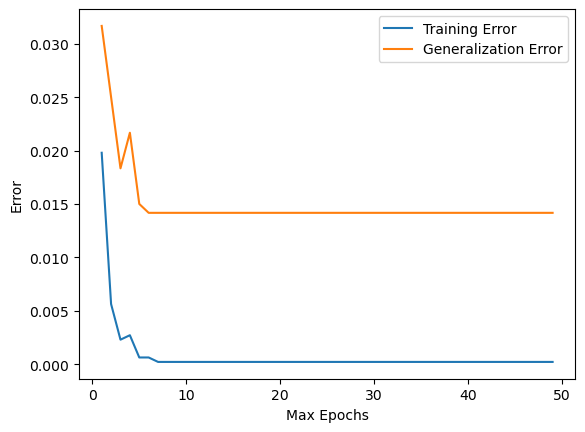

Optimal max epochs: 6


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, fbeta_score,accuracy_score
train_errors = []
test_errors = []

for max_epochs in range(1, 50):
    model = Perceptron(epoch=max_epochs)
    model.max_epochs = max_epochs
    model.train(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_errors.append(np.mean(y_train_pred != y_train))
    auc_train = roc_auc_score(y_train, y_train_pred)
    accuracy_score_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f2_train = fbeta_score(y_train, y_train_pred, beta=2)
    print("AUC_train: ", auc_train,"Accuracy_train: ", accuracy_score_train, "F1: ", f1_train, "F2: ", f2_train)

    y_test_pred = model.predict(X_test)
    test_errors.append(np.mean(y_test_pred != y_test))
    auc_test = roc_auc_score(y_test, y_test_pred)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    f2_test = fbeta_score(y_test, y_test_pred, beta=2)
    print("AUC_test: ", auc_test,"Accuracy_test: ", accuracy_score_test, "F1: ", f1_test, "F2: ", f2_test)
    

plt.plot(range(1,50), train_errors, label='Training Error')
plt.plot(range(1,50), test_errors, label='Generalization Error')
plt.legend()
plt.xlabel('Max Epochs')
plt.ylabel('Error')
plt.show()
print("Optimal max epochs:", np.argmin(test_errors)+1) 

In [9]:
optimal_errors = []
optimal_epochs = []
vocab_sizes = [] 
minn_values = [1, 5, 10, 15, 20, 100]

for minn in minn_values:
    # Build the vocabulary and transform the dataset
    #train_transformed, test_transformed, vocab = build_vocab(train_emails, test_emails, minn)
    train, test, map1 = build_vocab(train_emails, test_emails, minn)
    X_train, X_test, y_train, y_test = train, test, train_label, test_label
    
    # Record the vocabulary size
    vocab_sizes.append(len(map1))  # Added this line
    
    # Train the Perceptron for a range of epochs and get the test errors
    max_epochs = 20
    test_errors = []
    for epoch in range(1, max_epochs + 1):
        p = Perceptron(epoch=epoch)
        p.train(X_train, y_train)
        y_test_pred = p.predict(X_test)
        error = np.mean(y_test_pred != y_test)
        test_errors.append(error)
    
    # Determine the optimal epoch for this minn value
    optimal_epoch = np.argmin(test_errors) + 1
    optimal_error = test_errors[optimal_epoch - 1]
    
    # Record the results
    optimal_errors.append(optimal_error)
    optimal_epochs.append(optimal_epoch)

for minn, epoch, error, vocab_size in zip(minn_values, optimal_epochs, optimal_errors, vocab_sizes):
    print(f"minn={minn}: Optimal Epoch={epoch}, Test Error={error}, Vocabulary Size={vocab_size}")

# Choose the overall optimal minn value and epoch
optimal_index = np.argmin(optimal_errors)
optimal_minn = minn_values[optimal_index]
optimal_epoch = optimal_epochs[optimal_index]
optimal_error = optimal_errors[optimal_index]
optimal_vocab_size = vocab_sizes[optimal_index]  

print("\nOptimal Configuration:")
print(f"minn={optimal_minn}, Epoch={optimal_epoch}, Test Error={optimal_error}, Vocabulary Size={optimal_vocab_size}")

minn=1: Optimal Epoch=6, Test Error=0.018333333333333333, Vocabulary Size=80010
minn=5: Optimal Epoch=6, Test Error=0.02, Vocabulary Size=12484
minn=10: Optimal Epoch=8, Test Error=0.0175, Vocabulary Size=7968
minn=15: Optimal Epoch=5, Test Error=0.02, Vocabulary Size=6187
minn=20: Optimal Epoch=6, Test Error=0.014166666666666666, Vocabulary Size=5209
minn=100: Optimal Epoch=8, Test Error=0.0175, Vocabulary Size=1934

Optimal Configuration:
minn=20, Epoch=6, Test Error=0.014166666666666666, Vocabulary Size=5209


In [10]:
train, test, map1 = build_vocab(train_emails, test_emails, 20)
X_train, X_test, y_train, y_test = train, test, train_label, test_label
p = Perceptron(6)
p.train(X_train, y_train)

{1: 271, 2: 80, 3: 42, 4: 27, 5: 13, 6: 8}

In [ ]:
# weights = p.get_weight()
# print(len(weights))
# sorted_indices = np.argsort(weights)
# # top_word_indices = sorted_indices[:15]
# # bottom_word_indices = sorted_indices[-15:]
# negative_words = [map1[i] for i in sorted_indices[:15]]

# positive_words = [map1[i] for i in sorted_indices[-15:]]

# print("Words with most negative weights:", negative_words)
# print("Words with most positive weights:", positive_words)

In [14]:
class AvgPerceptron(Perceptron):
    
    def __init__(self, epoch):
        super().__init__(epoch)
        self.w_avg = None

    def get_weight(self):
        return self.w_avg

#     def train(self, trainx, trainy):
#         self.w = np.zeros(trainx.shape[1])
#         self.w_avg = np.zeros(trainx.shape[1])
#         self.n_updates = 0
#         epoch = 0
#         mistakes = {}
#         while True:
#             epoch += 1
#             mistakes[epoch] = 0
#             for x, y in zip(trainx, trainy):
#                 prediction = np.dot(x, self.w)
#                 if y * prediction <= 0:
#                     mistakes[epoch] += 1
#                     self.w += y * x
#                 self.w_avg += self.w
#                 self.n_updates += 1
#             if mistakes[epoch] == 0 or epoch == self.epoch:
#                 break
#         self.w_avg /= self.n_updates
#         return mistakes
    def train(self, trainx, trainy):
        self.w = np.zeros(trainx.shape[1])
        self.w_avg = np.zeros(trainx.shape[1])
        self.n_updates = 0
        epoch = 0
        mistakes = {}
        while True:
            epoch += 1
            mistakes[epoch] = 0
            for x, y in zip(trainx, trainy):
                # prediction = np.dot(x, self.w)
                # if y * prediction <= 0:
                # 	mistakes[epoch] += 1
                # 	self.w += y * x
                self.w, mis = self.sample_update(x,y)
                mistakes[epoch]+= mis
                self.w_avg += self.w
                self.n_updates += 1
            if mistakes[epoch] == 0 or epoch == self.epoch:
                break
        self.w_avg /= self.n_updates
        return mistakes


    def predict(self, newx):
        preds = np.dot(newx, self.w_avg)
        preds[preds <= 0] = -1 
        preds[preds > 0] = 1
        return preds

In [15]:
p1 = AvgPerceptron(5)
p1.train(X_train, y_train)
weights = p.get_weight()
pred = p.predict(X_test)
weights.shape

(5210,)

In [16]:
train, test, map1 = build_vocab(train_emails, test_emails, 15)
X_train, X_test, y_train, y_test = train, test, train_label, test_label

AUC_train:  0.9830959808309598 Accuracy_train:  0.985625 F1:  0.9772051536174429 F2:  0.9766244057052298
AUC_test:  0.9776467252996479 Accuracy_test:  0.9808333333333333 F1:  0.9682758620689654 F2:  0.9690778575372722
AUC_train:  0.9915472369154724 Accuracy_train:  0.9935416666666667 F1:  0.9897316992381583 F2:  0.9875727128503438
AUC_test:  0.9816024736613087 Accuracy_test:  0.9841666666666666 F1:  0.9737931034482759 F2:  0.9745996686913309
AUC_train:  0.9964208749642086 Accuracy_train:  0.9972916666666667 F1:  0.995702479338843 F2:  0.9947159841479524
AUC_test:  0.982199132372526 Accuracy_test:  0.985 F1:  0.9751381215469613 F2:  0.9751381215469614
AUC_train:  0.9970809409708095 Accuracy_train:  0.9977083333333333 F1:  0.9963660389824909 F2:  0.9957739038563126
AUC_test:  0.982199132372526 Accuracy_test:  0.985 F1:  0.9751381215469613 F2:  0.9751381215469614
AUC_train:  0.9978675949786759 Accuracy_train:  0.9985416666666667 F1:  0.9976859504132232 F2:  0.9966974900924702
AUC_test:  0

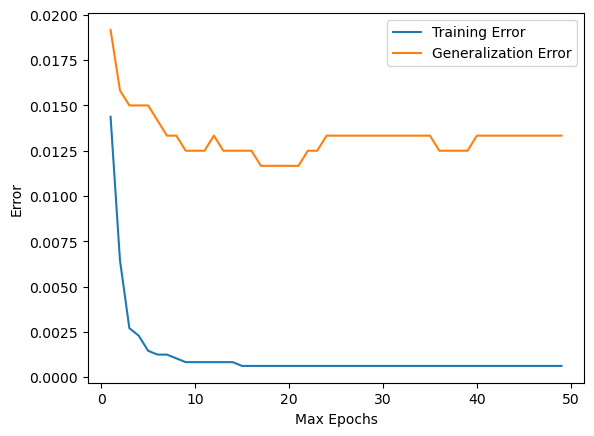

Optimal max epochs: 17


In [23]:
train_errors = []
test_errors = []

for max_epochs in range(1, 50):
    model = AvgPerceptron(epoch=max_epochs)
    model.max_epochs = max_epochs
    model.train(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_errors.append(np.mean(y_train_pred != y_train))
    auc_train = roc_auc_score(y_train, y_train_pred)
    accuracy_score_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f2_train = fbeta_score(y_train, y_train_pred, beta=2)
    print("AUC_train: ", auc_train,"Accuracy_train: ", accuracy_score_train, "F1: ", f1_train, "F2: ", f2_train)

    y_test_pred = model.predict(X_test)
    test_errors.append(np.mean(y_test_pred != y_test))
    auc_test = roc_auc_score(y_test, y_test_pred)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    f2_test = fbeta_score(y_test, y_test_pred, beta=2)
    print("AUC_test: ", auc_test,"Accuracy_test: ", accuracy_score_test, "F1: ", f1_test, "F2: ", f2_test)

plt.plot(range(1,50), train_errors, label='Training Error')
plt.plot(range(1,50), test_errors, label='Generalization Error')
plt.legend()
plt.xlabel('Max Epochs')
plt.ylabel('Error')
plt.show()
print("Optimal max epochs:", np.argmin(test_errors)+1) 

In [18]:
optimal_errors = []
optimal_epochs = []
vocab_sizes = [] 
minn_values = [1, 5, 10, 15, 20, 100]

for minn in minn_values:
    # Build the vocabulary and transform the dataset
    #train_transformed, test_transformed, vocab = build_vocab(train_emails, test_emails, minn)
    train, test, map1 = build_vocab(train_emails, test_emails, minn)
    X_train, X_test, y_train, y_test = train, test, train_label, test_label
    y_test = np.array(y_test)
    y_test[y_test == 0] = -1  
    y_train = np.array(y_train)
    y_train[y_train == 0] = -1 
    
    # Record the vocabulary size
    vocab_sizes.append(len(map1))  # Added this line
    
    # Train the Perceptron for a range of epochs and get the test errors
    max_epochs = 20
    test_errors = []
    for epoch in range(1, max_epochs + 1):
        p = AvgPerceptron(epoch=epoch)
        p.train(X_train, y_train)
        y_test_pred = p.predict(X_test)
        error = np.mean(y_test_pred != y_test)
        test_errors.append(error)
    
    # Determine the optimal epoch for this minn value
    optimal_epoch = np.argmin(test_errors) + 1
    optimal_error = test_errors[optimal_epoch - 1]
    
    # Record the results
    optimal_errors.append(optimal_error)
    optimal_epochs.append(optimal_epoch)

for minn, epoch, error, vocab_size in zip(minn_values, optimal_epochs, optimal_errors, vocab_sizes):
    print(f"minn={minn}: Optimal Epoch={epoch}, Test Error={error}, Vocabulary Size={vocab_size}")

# Choose the overall optimal minn value and epoch
optimal_index = np.argmin(optimal_errors)
optimal_minn = minn_values[optimal_index]
optimal_epoch = optimal_epochs[optimal_index]
optimal_error = optimal_errors[optimal_index]
optimal_vocab_size = vocab_sizes[optimal_index]  

print("\nOptimal Configuration:")
print(f"minn={optimal_minn}, Epoch={optimal_epoch}, Test Error={optimal_error}, Vocabulary Size={optimal_vocab_size}")

minn=1: Optimal Epoch=3, Test Error=0.015833333333333335, Vocabulary Size=80010
minn=5: Optimal Epoch=7, Test Error=0.014166666666666666, Vocabulary Size=12484
minn=10: Optimal Epoch=1, Test Error=0.015833333333333335, Vocabulary Size=7968
minn=15: Optimal Epoch=17, Test Error=0.011666666666666667, Vocabulary Size=6187
minn=20: Optimal Epoch=13, Test Error=0.011666666666666667, Vocabulary Size=5209
minn=100: Optimal Epoch=3, Test Error=0.015833333333333335, Vocabulary Size=1934

Optimal Configuration:
minn=15, Epoch=17, Test Error=0.011666666666666667, Vocabulary Size=6187


In [31]:
train, test, map1 = build_vocab(train_emails, test_emails, 15)
X_train, X_test, y_train, y_test = train, test, train_label, test_label
p = AvgPerceptron(17)
p.train(X_train, y_train)
y_pred = p.predict(X_test)
accuracy = np.mean(y_pred == y_test)

In [32]:
accuracy

0.9883333333333333

In [33]:
weights = p.get_weight()

In [34]:
feature_weights = weights[:-1]
words = np.array(list(map1.keys()))
sorted_indices = np.argsort(feature_weights)


top_positive_words = words[sorted_indices[-15:]][::-1] 
top_negative_words = words[sorted_indices[:15]]
print("Top 15 words with the most positive weights:")
print(top_positive_words)

print("\nTop 15 words with the most negative weights:")
print(top_negative_words)

Top 15 words with the most positive weights:
['sight' 'pleas' 'market' 'click' 'present' 'am' 'remov' 'our' 'nbsp'
 'here' 'basenumb' 'offer' 'deathtospamdeathtospamdeathtospam' 'major'
 'further']

Top 15 words with the most negative weights:
['wrote' 'prefer' 'i' 'author' 'which' 'inc' 'reserv' 'often' 'copyright'
 'septemb' 'too' 'the' 'set' 'run' 'and']
